<a href="https://colab.research.google.com/github/FernandoElizarraras7/SIMULACION-I/blob/main/INVENTARIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EJEMPLO 5.5: SISTEMA DE INVENTARIOS
La demanda mensual de un cierto producto sigue la siguiente distribución de probabilidad empírica:
$$\begin{matrix}
Cantidad & Probabilidad & Cantidad & Probabilidad & Cantidad & Probabilidad \\
35 & 0.010 & 44 & 0.029 & 53 & 0.065 \\
36 & 0.015 & 45 & 0.035 & 54 & 0.060 \\
37 & 0.020 & 46 & 0.045 & 55 & 0.050 \\
38 & 0.020 & 47 & 0.060 & 56 & 0.040 \\
39 & 0.022 & 48 & 0.065 & 57 & 0.030 \\
40 & 0.023 & 49 & 0.070 & 58 & 0.016 \\
41 & 0.025 & 50 & 0.080 & 59 & 0.015 \\
42 & 0.027 & 51 & 0.075 & 60 & 0.005 \\
43 & 0.028 & 52 & 0.070
\end{matrix}$$

El tiempo de entrega está distribuido de acuerdo a la siguiente función de probabilidad:
$$\begin{matrix}
Meses & 1 & 2 & 3 \\
Probabilidad & 0.30 & 0.40 & 0.30
\end{matrix}$$

Los factores estacionales para cada uno de los meses de año son como se muestra a continuación:
$$\begin{matrix}
Mes & Factores\,estacionales & Mes & Factores\,estacionales \\
   1 & 1.20 & 7 & 0.80 \\
   2 & 1.00 & 8 & 0.90 \\
   3 & 0.90 & 9 & 1.00 \\
   4 & 0.80 & 10 & 1.20 \\
   5 & 0.80 & 11 & 1.30 \\
   6 & 0.70 & 12 & 1.40 \\
\end{matrix}$$
La información con respecto a los costos relevantes es la siguiente:
*   Costo de ordenar = \$100/orden
*   Costo de inventario = \$20/unidad/año
*   Costo de faltante = \$50/unidad

Si el inventario inicial se asume en 150 unidades, ¿determine la cantidad óptima a ordenar $(q)$ y el nivel óptimo de reorden $(R)$?


Mejor cantidad a ordenar (q): 100
Mejor nivel de reorden (R): 90
Menor costo total: $2813.33


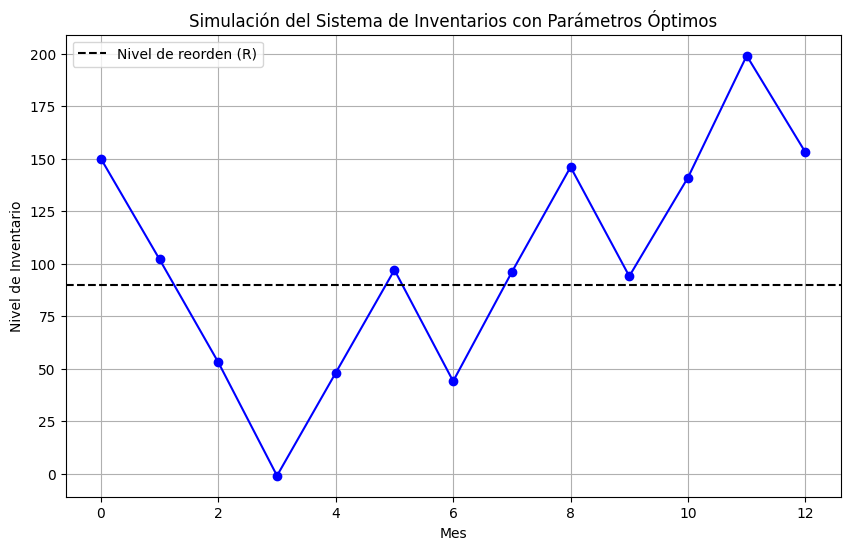

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las probabilidades acumuladas para la demanda
demanda_cantidades = [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
demanda_probabilidades = [0.010, 0.015, 0.020, 0.020, 0.022, 0.023, 0.025, 0.027, 0.028, 0.029, 0.035, 0.045, 0.060, 0.065, 0.070, 0.080, 0.075, 0.070, 0.065, 0.060, 0.050, 0.040, 0.030, 0.016, 0.015, 0.005]
demanda_acumulada = np.cumsum(demanda_probabilidades)

# Definir las probabilidades acumuladas para el tiempo de entrega
tiempo_entrega_meses = [1, 2, 3]
tiempo_entrega_probabilidades = [0.30, 0.40, 0.30]
tiempo_entrega_acumulada = np.cumsum(tiempo_entrega_probabilidades)

# Función de transformada inversa para la demanda
def generar_demanda():
    u = np.random.rand()
    for i, prob in enumerate(demanda_acumulada):
        if u <= prob:
            return demanda_cantidades[i]

# Función de transformada inversa para el tiempo de entrega
def generar_tiempo_entrega():
    u = np.random.rand()
    for i, prob in enumerate(tiempo_entrega_acumulada):
        if u <= prob:
            return tiempo_entrega_meses[i]

# Parámetros del problema
inventario_inicial = 150
n_meses = 12

# Costos relevantes
costo_ordenar = 100
costo_inventario = 20 / 12  # por mes
costo_faltante = 50

# Simulación de inventario con cálculo de costos
def simular_inventario(q, R):
    inventario = [inventario_inicial]
    ordenes = []
    tiempo_entrega = [0] * n_meses
    entregas = []
    costo_total = 0

    for mes in range(1, n_meses + 1):
        demanda_mes = generar_demanda()
        inventario_actual = inventario[-1] - demanda_mes
        if inventario_actual < R:
            ordenes.append(mes)
            tiempo_entrega[mes - 1] = generar_tiempo_entrega()
            entregas.append(mes + tiempo_entrega[mes - 1])
            costo_total += costo_ordenar

        inventario.append(inventario_actual)

        if inventario_actual < 0:
            costo_total += -inventario_actual * costo_faltante

        if mes in entregas:
            inventario[-1] += q

        costo_total += max(inventario[-1], 0) * costo_inventario

    return costo_total

# Búsqueda de malla para encontrar la solución óptima
mejor_costo = float('inf')
mejor_q = None
mejor_R = None

for q in range(50, 301, 50):
    for R in range(50, 151, 10):
        costo_actual = simular_inventario(q, R)
        if costo_actual < mejor_costo:
            mejor_costo = costo_actual
            mejor_q = q
            mejor_R = R

print(f"Mejor cantidad a ordenar (q): {mejor_q}")
print(f"Mejor nivel de reorden (R): {mejor_R}")
print(f"Menor costo total: ${mejor_costo:.2f}")

# Simulación del inventario con los mejores parámetros
def simular_inventario_detallado(q, R):
    inventario = [inventario_inicial]
    ordenes = []
    tiempo_entrega = [0] * n_meses
    entregas = []

    for mes in range(1, n_meses + 1):
        demanda_mes = generar_demanda()
        inventario_actual = inventario[-1] - demanda_mes
        if inventario_actual < R:
            ordenes.append(mes)
            tiempo_entrega[mes - 1] = generar_tiempo_entrega()
            entregas.append(mes + tiempo_entrega[mes - 1])

        inventario.append(inventario_actual)

        if mes in entregas:
            inventario[-1] += q

    return inventario, ordenes, entregas

# Generar gráfico con los mejores parámetros
inventario, ordenes, entregas = simular_inventario_detallado(mejor_q, mejor_R)

plt.figure(figsize=(10, 6))
meses = list(range(n_meses + 1))
plt.plot(meses, inventario, marker='o', linestyle='-', color='b')

# Línea negra para indicar el nivel de reorden
plt.axhline(y=mejor_R, color='k', linestyle='--', label='Nivel de reorden (R)')

plt.title('Simulación del Sistema de Inventarios con Parámetros Óptimos')
plt.xlabel('Mes')
plt.ylabel('Nivel de Inventario')
plt.legend()
plt.grid(True)
plt.show()

## Conclusiones
*   La simulación permitió identificar los valores óptimos para la cantidad a ordenar $(q)$ y el nivel de reorden $(R)$ que minimizan el costo total del sistema de inventario.
*   Se observó cómo el nivel de inventario varía mes a mes, y cómo las órdenes y tiempos de entrega afectan estos niveles.

## Posibles extensiones
*   **Ampliar el Horizonte Temporal:** Incrementar el número de meses simulados para observar el comportamiento del sistema a largo plazo.
*   **Análisis de Sensibilidad:** Evaluar cómo cambios en los costos (ordenar, inventario, faltante) afectan los parámetros óptimos.
*   **Simulación Monte Carlo:** Realizar múltiples simulaciones con diferentes semillas aleatorias para evaluar la variabilidad de los resultados y obtener intervalos de confianza.
*   **Considerar Descuentos por Volumen:** Incorporar descuentos por volumen al costo de ordenar para ver cómo afectan los resultados.


